In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize images (convert values to range 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Reshape images to add a color channel
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [5]:
# Create a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8953 - loss: 0.3474
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9798 - loss: 0.0654
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9870 - loss: 0.0443
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9914 - loss: 0.0294
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9929 - loss: 0.0223
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9955 - loss: 0.0146
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9968 - loss: 0.0109
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9977 - loss: 0.0079
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9980 - loss: 0.0064
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9983 - loss: 0.0052
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9985 - loss: 0.0053
Epoch 12

In [7]:
# Test the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc * 100, "%")
from sklearn.metrics import classification_report

# Get model predictions on the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels  # Assuming test_labels are in integer form

# Print classification report (includes precision, recall, and F1-score)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9818 - loss: 0.0971
Test Accuracy: 98.54999780654907 %
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [8]:
# Predict a single image in MINST
sample_image = test_images[0].reshape(1, 28, 28, 1)
predicted_digit = np.argmax(model.predict(sample_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


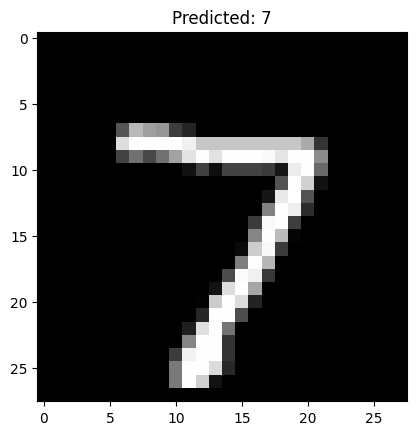

In [9]:
# Show the image and prediction
plt.imshow(sample_image.reshape(28,28), cmap='gray')
plt.title("Predicted: " + str(predicted_digit))
plt.show()

In [10]:
#testing image in google drive
from google.colab import drive
from PIL import Image

In [11]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
image_path = "/content/drive/My Drive/6.png"  # Change to your file path
img = Image.open(image_path).convert('L')
img = img.resize((28, 28))
img = np.array(img).astype('float32') / 255.0
img = img.reshape(1, 28, 28, 1)


In [22]:
# Predict digit
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


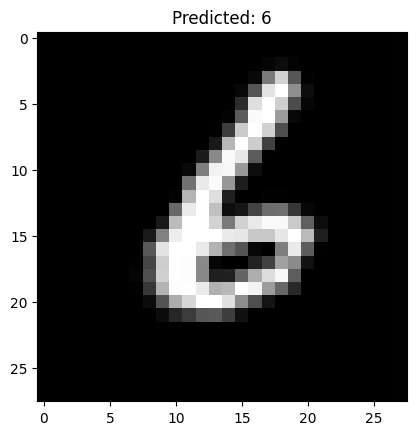

In [23]:
# Show the image and prediction
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title("Predicted: " + str(predicted_digit))
plt.show()